In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
# Read the Excel file into a DataFrame
df = pd.read_excel('social_data.xlsx')

In [3]:
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video


#### 1. What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [4]:
campaign_df = df[df['Campaign Name'] != 'N/A ']
campaign_df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882.0,83.0,Photo
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo
...,...,...,...,...,...,...,...
3440,2023-01-08 11:47:23.222,General,TWITTER,Community Engagement,19823.0,243.0,Photo
3459,2023-01-05 09:00:25.769,CSGO,TWITTER,Community Engagement,445130.0,10597.0,Video
3461,2023-01-04 14:57:31.000,General,FBPAGE,Community Engagement,155521.0,19098.0,Photo
3464,2023-01-04 13:00:02.187,General,TWITTER,Community Engagement,136660.0,2371.0,Photo


In [5]:
engagement_rate = np.mean(campaign_df['Total Engagements'] / campaign_df['Total Impressions']) * 100
print("Engagement Rate: {:.2f}%".format(engagement_rate))

Engagement Rate: 4.99%


In [6]:
pr = campaign_df[campaign_df['Total Engagements'] / campaign_df['Total Impressions'] >= 0.15].shape[0] / \
campaign_df.shape[0] * 100
print("Likelihood that we can achieve a 15% engagement rate is {:.2f}%".format(pr))

Likelihood that we can achieve a 15% engagement rate is 7.17%


#### 2. Does day of the week and time of posting affect engagement rates?

In [7]:
campaign_df = campaign_df.copy()
campaign_df['Engagement Rate'] = campaign_df['Total Engagements'] / campaign_df['Total Impressions']

In [8]:
campaign_df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video,0.127666
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882.0,83.0,Photo,0.044102
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892.0,3076.0,Video,0.171920
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874.0,1447.0,Video,0.104296
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692.0,8044.0,Photo,0.213414
...,...,...,...,...,...,...,...,...
3440,2023-01-08 11:47:23.222,General,TWITTER,Community Engagement,19823.0,243.0,Photo,0.012258
3459,2023-01-05 09:00:25.769,CSGO,TWITTER,Community Engagement,445130.0,10597.0,Video,0.023807
3461,2023-01-04 14:57:31.000,General,FBPAGE,Community Engagement,155521.0,19098.0,Photo,0.122800
3464,2023-01-04 13:00:02.187,General,TWITTER,Community Engagement,136660.0,2371.0,Photo,0.017350


In [9]:
# Apply day_name() to 'Published Date' column
campaign_df['Day of Week'] = campaign_df['Published Date'].dt.day_name()

In [10]:
# Compute the average engagement rate for each day of the week
average_engagement_rate = campaign_df.groupby('Day of Week')['Engagement Rate'].mean()
sorted_engagement_rate = average_engagement_rate.sort_values(ascending=False)

# Display the sorted average engagement rates
print(sorted_engagement_rate)

Day of Week
Tuesday      0.067066
Friday       0.053610
Sunday       0.050625
Thursday     0.047854
Wednesday    0.043913
Monday       0.037770
Saturday     0.037633
Name: Engagement Rate, dtype: float64


The average engagement rates for each day of the week are listed above. Tuesday has the highest engagement rate, and Saturday has the lowest.

In [11]:
# Define the time windows
time_windows = [0, 6, 12, 18, 24]

# Create the 'Time of Day' column
campaign_df['Time of Day'] = pd.cut(campaign_df['Published Date'].dt.hour, \
                                    bins=time_windows, \
                                    labels=['0-6', '6-12', '12-18', '18-24'])

In [12]:
# Compute the average engagement rate for each day of the week
average_engagement_rate_by_time = campaign_df.groupby('Time of Day')['Engagement Rate'].mean()
sorted_engagement_rate_by_time = average_engagement_rate_by_time.sort_values(ascending=False)

# Display the sorted average engagement rates
print(sorted_engagement_rate_by_time)

Time of Day
0-6      0.077037
6-12     0.054885
18-24    0.042959
12-18    0.042505
Name: Engagement Rate, dtype: float64


The average engagement rates for different time windows of the day are listed above. 0-6 am time window has the highest engagement rate, and 12-18 pm time window has the lowest.

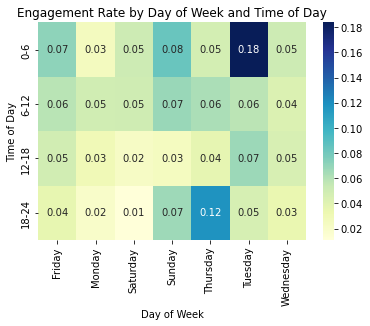

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a matrix for visualization
heatmap_data = campaign_df.pivot_table(index='Time of Day', columns='Day of Week', values='Engagement Rate')

# Create the heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")

# Set the plot title and axis labels
plt.title('Engagement Rate by Day of Week and Time of Day')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')

# Display the plot
plt.show()

The heatmap above visualize engagement rates for each time window in each day of the week, with rows representing the 'Time of Day', and the columns representing the 'Day of Week', and the values correspond to the 'Engagement Rate'.

0-6 am on Tuesdays have the highest engagement rate and 18-24 pm on Saturday have the lowest engagement rate.

#### 3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [14]:
# Replace 'General  ' with 'General' in 'Account' column
campaign_df['Account'] = campaign_df['Account'].str.replace('General ', 'General')

In [15]:
# Compute the average engagement rates for each game
average_engagement_rate_by_game = campaign_df.groupby('Account')['Engagement Rate'].mean()
sorted_average_engagement_rate_by_game = average_engagement_rate_by_game.sort_values(ascending=False)

# Display the sorted average engagement rates
print(sorted_average_engagement_rate_by_game)

Account
Content Creators    0.186702
Valorant            0.053748
DOTA2               0.052123
General             0.050306
CSGO                0.037987
Name: Engagement Rate, dtype: float64


The average engagement rates for different games are listed above. "Content Creators" game title has the highest engagement rates, and "CSGO" game title has the lowest. This may indicate that we should focus more on "Content Creators" and less on "CSGO".

#### 4. What media type performs the best?

In [16]:
# Compute the average total impressions for each game
average_engagement_rate_by_media = campaign_df.groupby('Media Type')['Engagement Rate'].mean()
sorted_average_engagement_rate_by_media = average_engagement_rate_by_media.sort_values(ascending=False)

# Display the sorted average engagement rates for each media type
print(sorted_average_engagement_rate_by_media)

Media Type
Mixed       0.107246
Photo       0.053550
Video       0.050503
Text        0.039601
Carousel    0.037843
Link        0.009359
Name: Engagement Rate, dtype: float64


"Mixed" Media Type performs the best since it has the highest average engagement rate.

#### 5. What is our best performing campaign?

In [17]:
# Compute the average total impressions for each game
average_engagement_rate_by_campaign = campaign_df.groupby('Campaign Name')['Engagement Rate'].mean()
sorted_average_engagement_rate_by_campaign = average_engagement_rate_by_campaign.sort_values(ascending=False)

# Display the sorted average engagement rates for each campaign
print(sorted_average_engagement_rate_by_campaign)

Campaign Name
Community Engagement     0.057653
Evergreen                0.035105
Evil Exhibited           0.028661
Name: Engagement Rate, dtype: float64


"Community Engagement" is the best performing campaign since it has the highest average engagement rate.

#### 6. Define out a posting strategy for our social channels based on your discoveries.

I would propose the posting strategy from the following 4 aspects.

1. Time of Day: 
- Focus on posting content during the 0-6 am time window on Tuesdays, as it has shown the highest engagement rate. This suggests that audience is particularly active and responsive during this period. Plan to schedule posts and prioritize engaging content during this time slot.
- Also, we may want to consider reducing or adjusting the posting frequency during the 18-24 pm time window on Saturdays, as it has shown the lowest engagement rate. Evaluate the effectiveness of the content during this time and consider alternative strategies such as reposting popular content or focusing on other days with higher engagement rates.

2. Game Titles:

- Allocate more resources and focus on promoting the "Content Creators" game title since it has shown the highest engagement rates. This indicates that audience is highly interested and engaged with this specific game. Consider creating tailored content, hosting events, or collaborating with influencers that are relevant to this game title to further enhance engagement.
- Adjust the promotion strategy for the "CSGO" game title, which has shown the lowest engagement rates. Explore potential reasons for the lower engagement and consider targeting different audience segments, refreshing content, or evaluating the game's appeal to the target audience. Determine if alternative marketing strategies or adjustments to the game's positioning are necessary to improve engagement.

3. Media Type:
- Prioritize the "Mixed" media type as it has demonstrated the best performance in terms of average engagement rate. This suggests that audience responds positively to this media type. Focus on creating diverse and engaging content formats such as videos, images, and interactive elements to maximize engagement.
- While prioritizing the "Mixed" media type, it's important to maintain a balanced approach and continue exploring other media types to provide variety and cater to different preferences. Evaluate the performance of other media types and consider incorporating them strategically into the social channels.

4. Campaigns:

- Leverage the success of the "Community Engagement" campaign, which has shown the highest average engagement rate. This indicates that audience resonates well with the themes and activities of this campaign. Continue to emphasize community engagement initiatives, encourage user participation, and foster a sense of community within the social channels.
- While focusing on the "Community Engagement" campaign, also consider running parallel campaigns that align with the overall marketing objectives and cater to specific game titles or audience segments. Ensure a well-rounded mix of campaigns that address different aspects of the brand and engage a wide range of target audience.

#### 7. What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

1. Understand our target audience
- They can conduct research and analysis to identify where the target audience is most active and engaged. This will help to determine the platforms that align with audience's demographics, interests, and behaviors.

2. Evaluate platform suitability
- Assess the suitability of each social media platform based on our goals, content type, and target audience. Consider the strengths and features of each platform, as well as the compatibility with our content. For example, if the CSGO YouTube channel is performing well and we want to reach a younger audience, expanding to TikTok could be a viable option due to its popularity among younger demographics and its focus on short-form video content.

3. Adapt content strategy
- It's also essential to adapt our content strategy to fit the characteristics of the platform we are expanding to. Understand the content trends and preferences of the new platform and tailor our content accordingly. Repurposing or creating new content specifically designed for the platform will help us maximize engagement and resonate with the new audience.

4. Allocate resources wisely
- Expanding to new social media platforms requires dedicated resources in terms of content creation, management, and engagement. Assess the team's capacity and capabilities first to ensure they can effectively manage the additional platforms without compromising the quality or consistency of your content.